In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create 

In [2]:
# Read in the data

df =pd.read_csv('/Users/sy/Documents/PortfolioProjects/Datasets/movies.csv')

In [3]:
# Review data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Check if there is missing data

for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# Remove rows with NA values in dataframe
df = df.dropna()

# Check if there is still missing data
for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [6]:
# Check data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Change data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [8]:
df['yearcorrected'] = df['released'].astype(str).str[:4]

In [9]:
df.sort_values(by=['gross'], inplace= False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,Janu
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,June
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,May
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,Marc


In [10]:
# Drop duplicates

df = df.drop_duplicates()

In [11]:
# Hypothesis: Budget has high correlation with Gross
# Hypothesis2: Company may be correlated with Gross


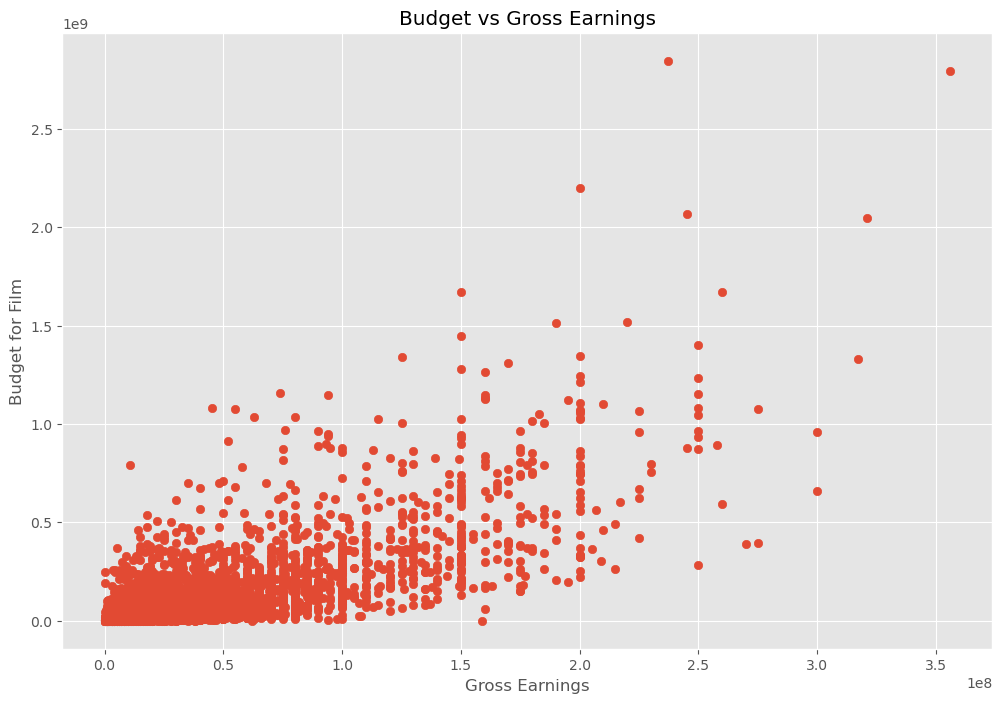

In [12]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()


<AxesSubplot:xlabel='budget', ylabel='gross'>

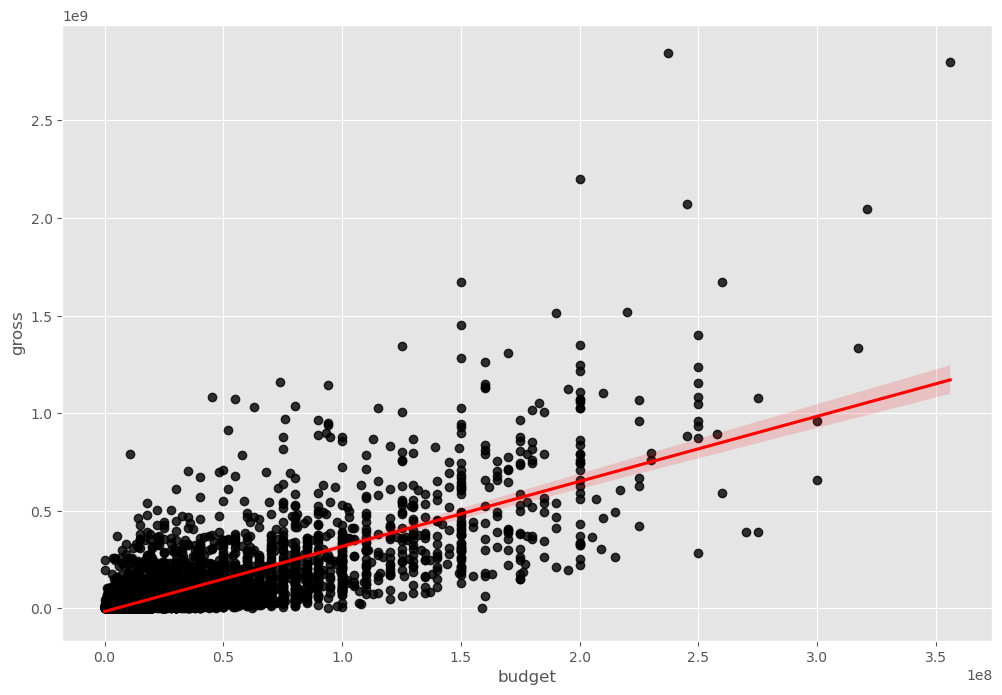

In [13]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"black"}, line_kws={"color":"red"})

In [14]:
# Check correlation

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [15]:
df.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [16]:
df.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


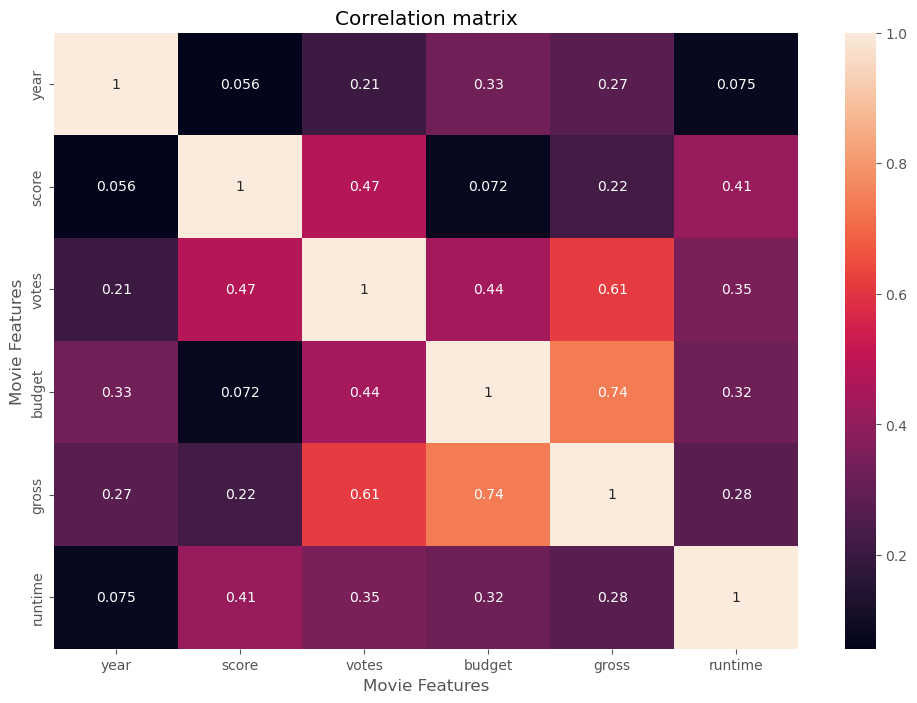

In [17]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [18]:
# Using factorize - this assigns a random numeric value for each unique categorical values

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
name,1.000000,0.169808,0.028413,0.965461,0.966086,-0.020083,0.297305,0.725411,0.791872,0.695124,0.098110,0.288955,0.967925,0.535369,0.048980,0.037432
rating,0.169808,1.000000,-0.116507,0.179456,0.171063,0.036114,0.097619,0.096014,0.128909,0.115694,-0.004547,0.203698,0.172703,-0.026286,0.032265,-0.030215
genre,0.028413,-0.116507,1.000000,0.031765,0.031251,-0.027402,-0.009983,0.036671,0.033975,0.045497,-0.003314,0.020893,0.032033,0.015127,0.000056,0.006208
year,0.965461,0.179456,0.031765,1.000000,0.996490,-0.014594,0.323916,0.747785,0.812386,0.719373,0.095073,0.319135,0.996371,0.537731,0.055864,0.037224
released,0.966086,0.171063,0.031251,0.996490,1.000000,-0.019486,0.313254,0.750825,0.809858,0.720076,0.096807,0.309616,0.998490,0.546033,0.049650,0.032142
score,-0.020083,0.036114,-0.027402,-0.014594,-0.019486,1.000000,-0.041981,-0.006583,-0.021538,0.015108,0.016567,-0.005493,-0.015744,-0.008555,0.011831,0.032530
votes,0.297305,0.097619,-0.009983,0.323916,0.313254,-0.041981,1.000000,0.187909,0.225105,0.182043,-0.021562,0.359065,0.307248,0.007423,0.126362,-0.058485
director,0.725411,0.096014,0.036671,0.747785,0.750825,-0.006583,0.187909,1.000000,0.717990,0.636705,0.095349,0.124051,0.751737,0.483737,-0.026918,0.040413
writer,0.791872,0.128909,0.033975,0.812386,0.809858,-0.021538,0.225105,0.717990,1.000000,0.626647,0.098623,0.208088,0.811356,0.477503,0.023123,0.044047
star,0.695124,0.115694,0.045497,0.719373,0.720076,0.015108,0.182043,0.636705,0.626647,1.000000,0.098071,0.138015,0.720811,0.442307,0.033297,0.049292


In [19]:
# Converting categorical values into numeric

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,11
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,10
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,11
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,10
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,10


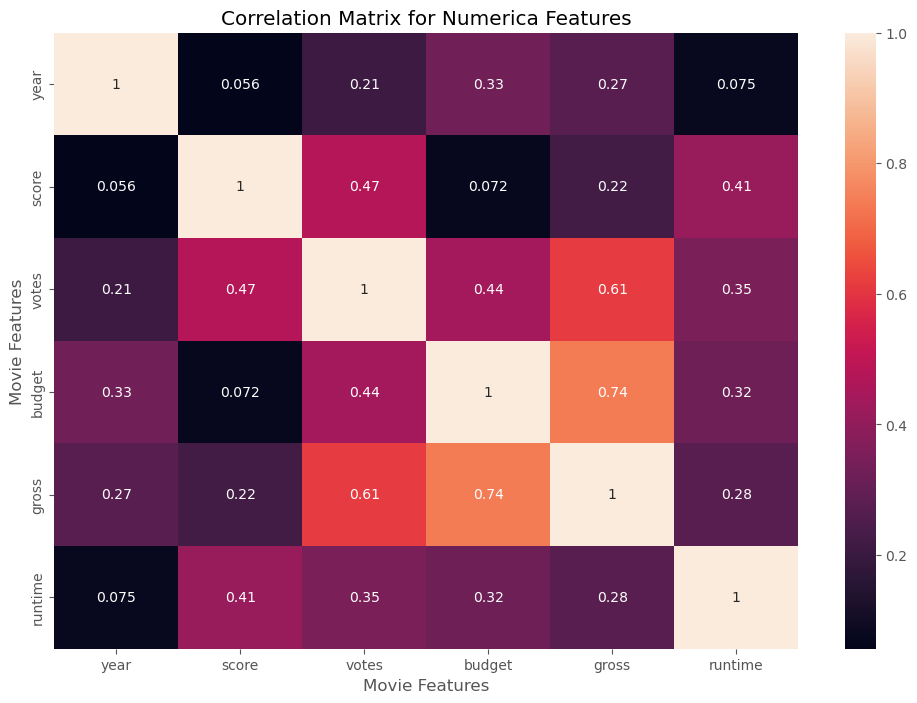

In [20]:
correlation_mat = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numerica Features')
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [21]:
correlation_m = df_numerized.corr()
corr_pairs = correlation_m.unstack()
sorted_pairs =corr_pairs.sort_values()
sorted_pairs

budget         genre           -0.368523
genre          budget          -0.368523
gross          genre           -0.244101
genre          gross           -0.244101
rating         budget          -0.203946
                                  ...   
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
yearcorrected  yearcorrected    1.000000
Length: 256, dtype: float64

In [22]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross          votes            0.614751
votes          gross            0.614751
budget         gross            0.740247
gross          budget           0.740247
yearcorrected  released         0.996181
released       yearcorrected    0.996181
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
yearcorrected  yearcorrected    1.000000
dtype: float64

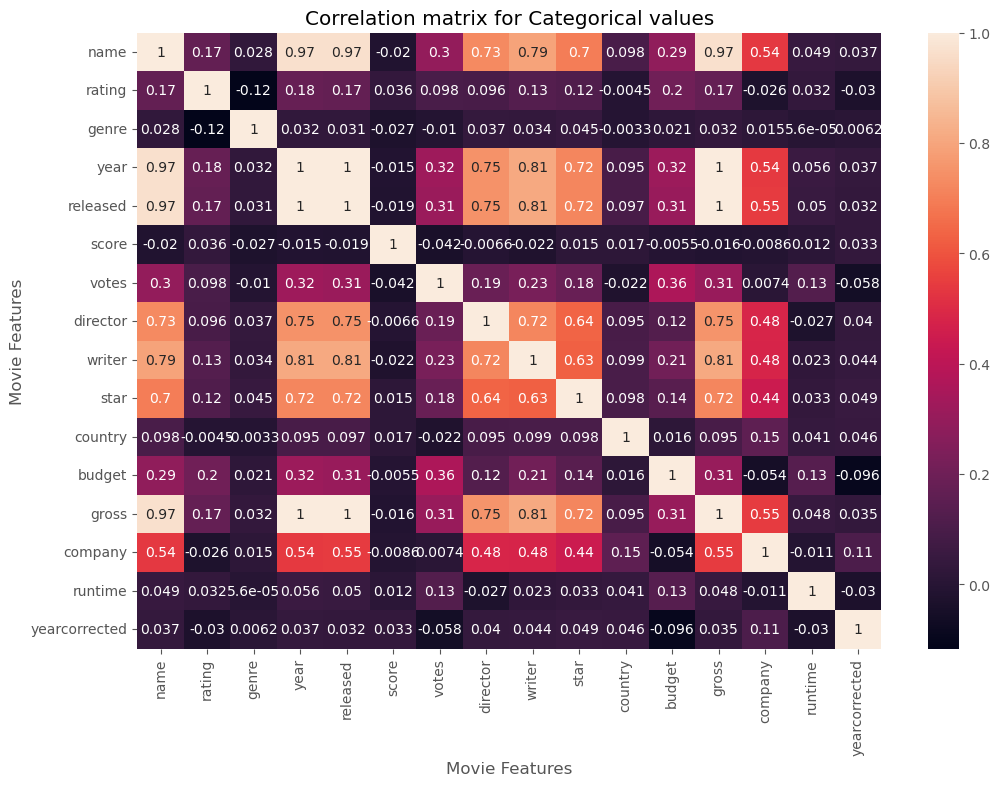

In [23]:
# Creating correlation heatmap for categorical values

correlation_matrix = df.apply(lambda x:x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for Categorical values")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [24]:
# Find correlation pairs

correlation_mat = df.apply(lambda x:x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name           name             1.000000
               rating           0.169808
               genre            0.028413
               year             0.965461
               released         0.966086
                                  ...   
yearcorrected  budget          -0.095758
               gross            0.035034
               company          0.109470
               runtime         -0.030109
               yearcorrected    1.000000
Length: 256, dtype: float64


In [25]:
sorted_pairs = corr_pairs.sort_values()
print(sorted_pairs)

genre          rating          -0.116507
rating         genre           -0.116507
yearcorrected  budget          -0.095758
budget         yearcorrected   -0.095758
yearcorrected  votes           -0.058485
                                  ...   
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
yearcorrected  yearcorrected    1.000000
Length: 256, dtype: float64


In [26]:
# Find pairs that have a high correlation(>0.5)

highCorrPairs = sorted_pairs[abs(sorted_pairs)>0.5]
print(highCorrPairs)

company        name             0.535369
name           company          0.535369
company        year             0.537731
year           company          0.537731
gross          company          0.545924
                                  ...   
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
yearcorrected  yearcorrected    1.000000
Length: 66, dtype: float64


In [27]:
# Looking at the top 15 companies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values("gross", ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')
CompanyGrossSumSorted

company
1426    54610959970
1397    51241105418
452     42356430218
1108    40021704691
1382    39542573303
1423    35833650748
1044    19612851164
983     15065592411
550     11873612858
551     11593807697
1367    10664679494
1001     8937010092
1309     8318570396
1134     7886344526
682      7243673721
Name: gross, dtype: int64